In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import pandas as pd

df_stat = pd.read_csv("~/Documents/Studies/Modules/DatenanalyseLifeScience/Tasks/GeneClustering/resources/pawitan-death-stat.csv")
df_genes = pd.read_csv("~/Documents/Studies/Modules/DatenanalyseLifeScience/Tasks/GeneClustering/resources/pawitan-gene-expr.csv")

data = df_genes.iloc[:, 2:]
df_stat

,Unnamed: 0,ID_REF,RELAPSE,SURV_RELAPSE,DEATH,DEATH_BC,SURV_DEATH,SUBTYPE,ELSTON
0,0,X027JO,1.0,3.82,1.0,1.0,4.14,No Subtype,2.0
1,1,X350JO,0.0,8.15,0.0,0.0,8.15,Luminal B,3.0
2,2,X028JA,0.0,8.36,1.0,0.0,2.22,Luminal A,1.0
3,3,X126AS,0.0,8.23,0.0,0.0,8.23,No Subtype,2.0
4,4,X005JO,0.0,8.07,1.0,0.0,5.55,Luminal A,NaN
...,...,...,...,...,...,...,...,...,...
154,154,X304VE,1.0,0.67,0.0,0.0,6.02,Luminal A,3.0
155,155,X015HE,1.0,2.79,1.0,1.0,3.07,ERBB2,3.0
156,156,X327EN,1.0,1.38,1.0,1.0,4.87,Basal,3.0
157,157,X184LO,0.0,5.62,0.0,0.0,5.62,Luminal A,1.0


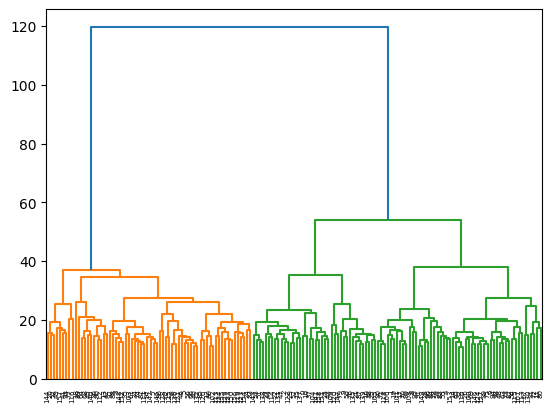

In [2]:
linkage_data = linkage(data.transpose(), method='ward', metric='euclidean')
dendrogram(linkage_data)


plt.show()

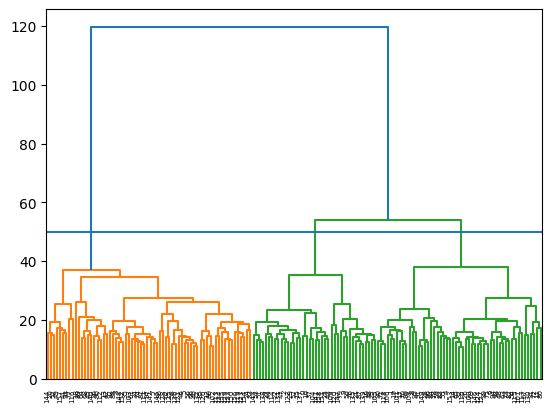

In [3]:

dendrogram(linkage_data)
plt.axhline(50)
plt.show()

In [4]:
cutree = cut_tree(linkage_data, height=50)

In [56]:
# Count alive/death patients
from scipy.cluster.hierarchy import leaves_list

leave_list = leaves_list(linkage_data)

masks = [(cutree == i).flatten() for i in range(3)]

class_x_df = []


for i in range(3):
    class_0 = leave_list[masks[i]]

    index_list = np.asarray(data.transpose().index)

    class_0_index = index_list[class_0]

    cass_0_df = df_stat.iloc[list(df_stat["ID_REF"].isin(list(class_0_index)))]
    cass_0_df.describe()
    class_x_df.append(cass_0_df)

class_x_df[0].describe()

,Unnamed: 0,RELAPSE,SURV_RELAPSE,DEATH,DEATH_BC,SURV_DEATH,ELSTON
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,36.000000
mean,81.300000,0.300000,6.149000,0.300000,0.250000,6.422500,2.222222
std,48.884584,0.464095,2.382895,0.464095,0.438529,1.925935,0.760117
min,0.000000,0.000000,0.230000,0.000000,0.000000,1.210000,1.000000
25%,43.250000,0.000000,4.405000,0.000000,0.000000,5.605000,2.000000
50%,91.500000,0.000000,7.275000,0.000000,0.000000,7.120000,2.000000
75%,122.000000,1.000000,8.030000,1.000000,0.250000,7.852500,3.000000
max,157.000000,1.000000,8.490000,1.000000,1.000000,8.490000,3.000000


(0.0, 50.0)

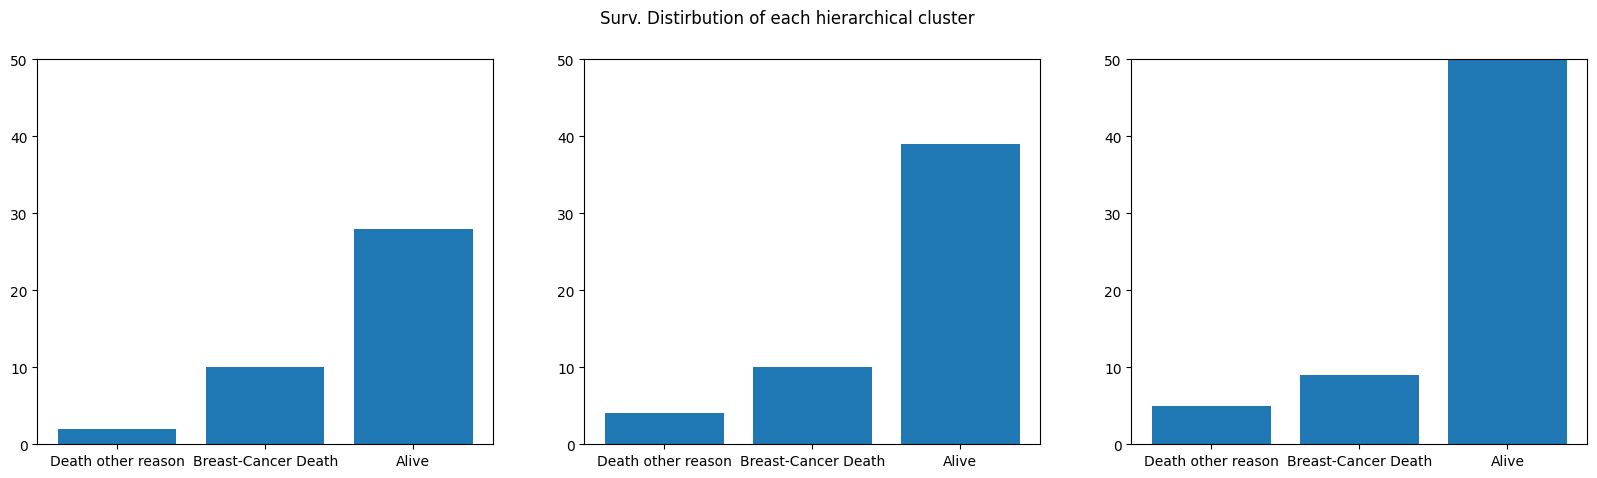

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Surv. Distirbution of each hierarchical cluster')

# Plot death/alive distributions class 0
df_temp = class_x_df[0]
alive = (df_temp['DEATH'] == False).sum()
death_bc = (df_temp['DEATH_BC'] == True).sum()
death_other = (df_temp['DEATH'] -  df_temp['DEATH_BC']).sum()

ax1.bar(x=['Death other reason', 'Breast-Cancer Death', 'Alive'], height=[death_other, death_bc, alive])
ax1.set_ylim(0, 50)

# Plot death/alive distributions class 1
df_temp = class_x_df[1]
alive = (df_temp['DEATH'] == False).sum()
death_bc = (df_temp['DEATH_BC'] == True).sum()
death_other = (df_temp['DEATH'] -  df_temp['DEATH_BC']).sum()

ax2.bar(x=['Death other reason', 'Breast-Cancer Death', 'Alive'], height=[death_other, death_bc, alive])
ax2.set_ylim(0, 50)

# Plot death/alive distributions class 2
df_temp = class_x_df[2]
alive = (df_temp['DEATH'] == False).sum()
death_bc = (df_temp['DEATH_BC'] == True).sum()
death_other = (df_temp['DEATH'] -  df_temp['DEATH_BC']).sum()

ax3.bar(x=['Death other reason', 'Breast-Cancer Death', 'Alive'], height=[death_other, death_bc, alive])
ax3.set_ylim(0, 50)

In [64]:
df = class_x_df[2].describe()
death_mean = df.loc['mean', 'DEATH']
death_mean

0.21212121212121213

Text(0.5, 1.0, 'CLuster Sizes')

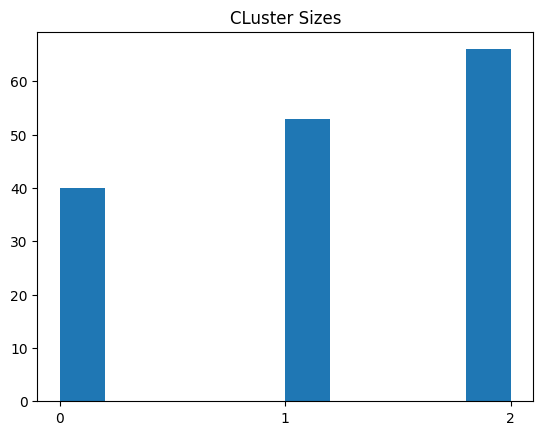

In [79]:
plt.hist(cutree)
plt.xticks([0,1,2])
plt.title('CLuster Sizes')

In [60]:
df_stat.head()

,Unnamed: 0,ID_REF,RELAPSE,SURV_RELAPSE,DEATH,DEATH_BC,SURV_DEATH,SUBTYPE,ELSTON
0,0,X027JO,1.0,3.82,1.0,1.0,4.14,No Subtype,2.0
1,1,X350JO,0.0,8.15,0.0,0.0,8.15,Luminal B,3.0
2,2,X028JA,0.0,8.36,1.0,0.0,2.22,Luminal A,1.0
3,3,X126AS,0.0,8.23,0.0,0.0,8.23,No Subtype,2.0
4,4,X005JO,0.0,8.07,1.0,0.0,5.55,Luminal A,NaN


Text(0.5, 1.0, 'Real Surv. Distribution')

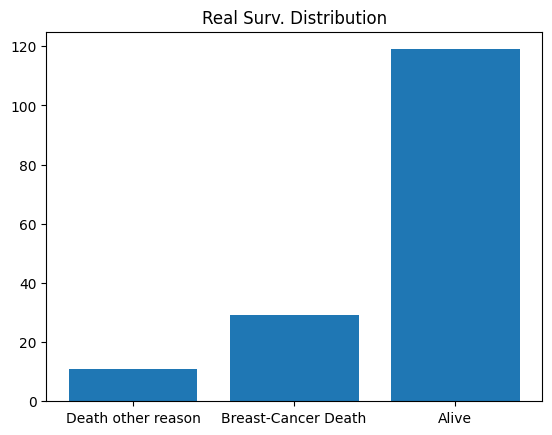

In [81]:
alive = (df_stat['DEATH'] == False).sum()
death_bc = (df_stat['DEATH_BC'] == True).sum()
death_other = (df_stat['DEATH'] -  df_stat['DEATH_BC']).sum()

plt.bar(x=['Death other reason', 'Breast-Cancer Death', 'Alive'], height=[death_other, death_bc, alive])
plt.title('Real Surv. Distribution')